### Exploratory Data Analysis 



The HOUSES dataset contains a collection of recent real estate listings in San Luis Obispo county and around it. The dataset is as a CSV file. The dataset contains the following fields:

1. MLS: Multiple listing service number for the house (unique ID).
2. Location: city/town where the house is located. Most locations are in San Luis Obispo county and northern Santa Barbara county (Santa Maria-Orcutt, Lompoc, Guadelupe, Los Alamos), but there some out of area locations as well.
4. Price: the most recent listing price of the house (in dollars).
5. Bedrooms: number of bedrooms.
6. Bathrooms: number of bathrooms.
7. Size: size of the house in square feet.
8. Price/SQ.ft: price of the house per square foot.
9. Status: type of sale. Thee types are represented in the dataset: Short Sale, Foreclosure and Regular.

Lets import the required libraries that we will be using later. 

In [1]:
from numpy import * # everything 
import pandas as pd 

Let's load the dataset into a pandas dataframe and have a look at the headers.

In [2]:
df = pd.read_csv('data.csv', sep=',', error_bad_lines=False) # read fie as a dataframe

Lets take a look at the first 2 rows of the dataframe.

In [3]:
df.head(2)

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,Arroyo Grande,795000,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000,4,3,2818,141.59,Short Sale


Examine the provided columns, does the pandas infered datatype of each column make sense? Inlucde your code and/or comments below. 

In [4]:
#TODO
MLS = df.MLS.describe()
location = df.Location.describe()
price = df.Price.describe()
bedroom = df.Bedrooms.describe()
bathroom = df.Bathrooms.describe()
size = df.Size.describe()
PPSF = df["Price/SQ.Ft"]
PS = PPSF.describe()
stat = df.Status.describe()

print(MLS)
print(location)
print(price)
print(bedroom)
print(bathroom)
print(size)
print(PS)
print(stat)

count       781.000000
mean     151224.550576
std        3936.122042
min      132842.000000
25%      149922.000000
50%      152581.000000
75%      154167.000000
max      154580.000000
Name: MLS, dtype: float64
count                    781
unique                    54
top       Santa Maria-Orcutt
freq                     265
Name: Location, dtype: object
count    7.810000e+02
mean     3.833291e+05
std      3.490381e+05
min      2.650000e+04
25%      1.990000e+05
50%      2.950000e+05
75%      4.290000e+05
max      5.499000e+06
Name: Price, dtype: float64
count    781.000000
mean       3.142125
std        0.855768
min        0.000000
25%        3.000000
50%        3.000000
75%        4.000000
max       10.000000
Name: Bedrooms, dtype: float64
count    781.000000
mean       2.355954
std        0.846596
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: Bathrooms, dtype: float64
count     781.000000
mean     1755.058899
std       819.5

Next, lets look at a specific column or feature in the dataframe. 
Based on the provided dataset, what are the distinct number of bedrooms and bathrooms?  Hint : Use the unique function https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html

In [5]:
# TODO
UBath = df.Bathrooms.unique()
UBed = df.Bedrooms.unique()

print(UBath)
print(UBed)

[ 3  4  1  2  5  7  6 11]
[ 3  4  2  7  1  5  0  6 10]


What if we want to drop a column from the dataframe, like the 'Location' column. Hint: Use the drop function https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [6]:
# TODO
df_drop = df.drop('Location', axis = 1)
print(df_drop)

        MLS    Price  Bedrooms  Bathrooms  Size  Price/SQ.Ft       Status
0    132842   795000         3          3  2371       335.30   Short Sale
1    134364   399000         4          3  2818       141.59   Short Sale
2    135141   545000         4          3  3032       179.75   Short Sale
3    135712   909000         4          4  3540       256.78   Short Sale
4    136282   109900         3          1  1249        87.99   Short Sale
..      ...      ...       ...        ...   ...          ...          ...
776  154562   319900         3          3  1605       199.31      Regular
777  154565   495000         3          2  1877       263.72      Regular
778  154566   372000         3          2  1104       336.96  Foreclosure
779  154575   589000         3          2  1975       298.23      Regular
780  154580  1100000         3          3  2392       459.87      Regular

[781 rows x 7 columns]


Let's rename the first column. 

Hint: A Google search for 'python pandas dataframe rename' points you at this documentation 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

In [7]:
print ("Before rename", df.columns)
#TODO
df.rename(columns = {'MLS' : 'MLS ID'}, inplace = True)
print ("After rename", df.columns)

Before rename Index(['MLS', 'Location', 'Price', 'Bedrooms', 'Bathrooms', 'Size',
       'Price/SQ.Ft', 'Status'],
      dtype='object')
After rename Index(['MLS ID', 'Location', 'Price', 'Bedrooms', 'Bathrooms', 'Size',
       'Price/SQ.Ft', 'Status'],
      dtype='object')


What is the max, min, mean/avg, and standard deviation of the column 'Bedrooms'?

In [8]:
# TODO
df.Bedrooms.describe()

count    781.000000
mean       3.142125
std        0.855768
min        0.000000
25%        3.000000
50%        3.000000
75%        4.000000
max       10.000000
Name: Bedrooms, dtype: float64

Plot the distribution of 'Price/SQ.Ft' using matplotlib

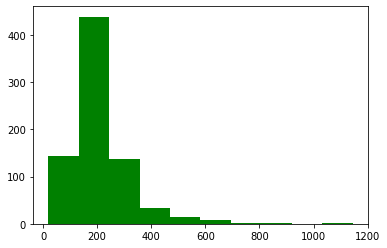

In [9]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# plot histogram 
n, bins, patches = plt.hist(df['Price/SQ.Ft'], 10, facecolor='green')
plt.show()

One of the best ways to inspect data is visualize it. One way to do this is by using a scatter plot. A scatter plot of the data puts one feature along the x-axis and another along the y-axis, and draws a dot for each data point. 

Since its difficult to visualize more than 2 or 3 features, one possibility is to use a pair plot that looks at all possible pairs of features. The pair plot shows the interaction of each pair of features inorder to visualize any correlation between features. 

(781, 8)


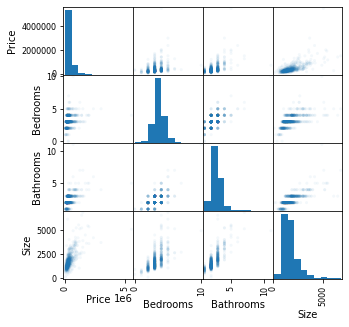

In [10]:
# import the scatter_matrix functionality
import random as rand
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

print (df.shape)
x = df.iloc[:,[1,2,3,4,5]] # extract only a subset of columns from dataframe (using index)
y = x.dropna(thresh=5) # drop any rows that have 5 or more fields as NAN  
a = scatter_matrix(x, alpha=0.05, figsize=(5,5), diagonal='hist')
plt.show()

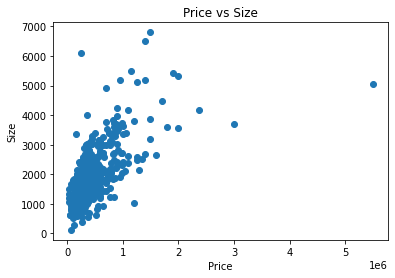

In [11]:
#Lets plot the Price vs Size of the homes

fig=plt.figure()
plt.scatter(df.Price, df.Size)
axis = fig.gca() #get current axis
axis.set_title('Price vs Size')
axis.set_xlabel('Price')
axis.set_ylabel('Size')
fig.canvas.draw()

What does the visualizations and the statistics we observed tell you so far. Is there any other interesting stats or visualizations you think might be helpful. Include your comments and code below

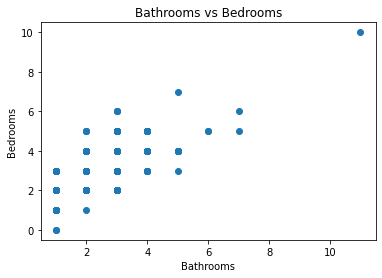

In [16]:
# TODO
fig=plt.figure()
plt.scatter(df.Bathrooms, df.Bedrooms)
axis = fig.gca() #get current axis
axis.set_title('Bathrooms vs Bedrooms')
axis.set_xlabel('Bathrooms')
axis.set_ylabel('Bedrooms')
fig.canvas.draw()

Another interesting visualization is that of the bedrooms and bathrooms. From the above graph we can observe that the two variables have a positive relationship. As the number of bedrooms increase so do the number of bathrooms.

## Categorical Encoding
If we have categorical or continuous variables and we would like to encode them into discrete integer files (like 0, 1, 2, ...) we can use several tricks in pandas to do this.

In [13]:
# Approach 1 - Pandas makes it easy for us to directly replace the text values with their numeric equivalent by using replace .

newValues = {"Status": {"Foreclosure": 1, "Short Sale": 2, "Regular" : 3}}
df2 = df.replace(newValues, inplace=False )
df2.head()

,MLS ID,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,Arroyo Grande,795000,3,3,2371,335.30,2
1,134364,Paso Robles,399000,4,3,2818,141.59,2
2,135141,Paso Robles,545000,4,3,3032,179.75,2
3,135712,Morro Bay,909000,4,4,3540,256.78,2
4,136282,Santa Maria-Orcutt,109900,3,1,1249,87.99,2


In [14]:
# Approach 2 - Another approach to encoding categorical values is to use a technique called label encoding.
# Label encoding is simply converting each value in a column to a number.

# One trick you can use in pandas is to convert a column to a category, then use those category 
# values for your label encoding. 

df["Status"] = df["Status"].astype('category')
df.dtypes

# Then you can assign the encoded variable to a new column using the cat.codes accessor.
df["Status_cat"] = df["Status"].cat.codes
df.head()

,MLS ID,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status,Status_cat
0,132842,Arroyo Grande,795000,3,3,2371,335.30,Short Sale,2
1,134364,Paso Robles,399000,4,3,2818,141.59,Short Sale,2
2,135141,Paso Robles,545000,4,3,3032,179.75,Short Sale,2
3,135712,Morro Bay,909000,4,4,3540,256.78,Short Sale,2
4,136282,Santa Maria-Orcutt,109900,3,1,1249,87.99,Short Sale,2


In [15]:
"""Approach 3 - Label encoding has the advantage that it is straightforward but it has the 
   disadvantage that the numeric values can be “misinterpreted” by the algorithms. For example, 
   the value of 1 is obviously less than the value of 3 but does that really correspond to the data set in real life?
   For example, is "Foreclosure" =1 closer to "Short Sale" =2 compared to "Regular" =3?

   A common alternative approach is called one hot encoding. The basic strategy is to convert each category value 
   into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting 
   a value improperly but does have the downside of adding more columns to the data set.

   Pandas supports this feature using get_dummies. This function is named this way because it creates 
   dummy/indicator variables (aka 1 or 0)."""

pd.get_dummies(df, columns=["Status"], prefix=["new"]).head()

# basically, it creates a 3 new columns (one for each unique value in the column.) with the prefix "new_"

,MLS ID,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status_cat,new_Foreclosure,new_Regular,new_Short Sale
0,132842,Arroyo Grande,795000,3,3,2371,335.30,2,0,0,1
1,134364,Paso Robles,399000,4,3,2818,141.59,2,0,0,1
2,135141,Paso Robles,545000,4,3,3032,179.75,2,0,0,1
3,135712,Morro Bay,909000,4,4,3540,256.78,2,0,0,1
4,136282,Santa Maria-Orcutt,109900,3,1,1249,87.99,2,0,0,1


# Submission Instructions


Once you are finished, follow these steps:

Restart the kernel and re-run this notebook from beginning to end by going to Kernel > Restart Kernel and Run All Cells.

If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

Go to File > Export Notebook As > PDF.

Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

Upload the PDF to iLearn.

Have the TA check your lab to obtain credit.